Progetto Data Analytcs

Con il presente progetto si andrà a classificare se un fungo sia commestibile o meno. Il problema è stato trattato come una generica rappresentazione binaria (commestibile/non commestibile), facendo particolare attenzione alla fase di addestramento e test. Per la realizzazione è stato scelto come riferimento il database "mushrooms" disponibile online su kaggle.com. All'interno si trovano 23 variabili che identificano habitat, colore, odore e altri parametri utili a riconoscere l'immediata edibilità della specie o eventuale pericolosità. Di questo dataset una parte verrà utilizzata per l'addestramento(20%) e una parte per il validation(10%), onde rendendere il nostro modello il più preciso possibile. Il lavoro è diviso per blocchi operativi che sono stati sviluppati e raggruppati in maniera tale che ognuno possa svolgere una singola funzione. Sono stati sviluppati i seguenti modelli per la classificazione:

1.   Rete neurale densa
2.   Regressore logistico
3.   Support vector machine
4.   Random forest

Il lavoro si articolerà come segue:


*   Librerie necessarie (saranno collocate tutte all'inizio ma verranno citate come commento nel momento in cui si dovrà ricorrere a quest'ultime);
*   Analisi e preparazione del dataset;
*   Creazione del validation set e del training set;
*   Valutazione dell'accuratezza tramite rete neurale, regressore logistico, support vector machine, random forest model.



In [ ]:
 %tensorflow_version 2.x


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_splits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [ ]:
from google.colab import files

uploaded = files.upload()



Saving mushrooms.csv to mushrooms.csv


Caricamento del dataset e visualizzazione delle variabili presenti all'interno.

In [ ]:
import pandas as pd
import io
dataset = pd.read_csv(io.StringIO(uploaded['mushrooms.csv'].decode('utf-8')))
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Verifico che all'interno non siano presenti dei valori nulli, perchè altrimenti il dataset avrebbe dei 'vuoti' che devono essere riempiti. Il '.sum()' permette di verificare il totale sulla riga.

In [ ]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

A questo è stata fatta una descrizione statistica delle variabili. Le statistiche descrittive includono quelle variabili che assumono la tendenza centrale, la dispersione e la forma della distribuzione nel dataset.

In [ ]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Preparazione dei dati



In [ ]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Si utilizza 'LabelEncoder' per andare a trasformare le etichette non numeriche in etichette numeriche. con 'Encoder_K.fit_trasform(), uso la codifica creata dal labelEncoder per applicare le etichette codificate ai singoli parametri.

In [ ]:
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


A questo punto è stato necessario andare a separare il validation, train and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


E' stato necessario adattare i dati prima di darli in ingresso ai vari motori di classificazione. Per farlo è stato utilizzato lo 'standarScaler()', libreria che permette di standardizzare le funzionalità adattandole alla varianza dell'unità. Questi dati verranno memorizzati e utilizzati per il successivo 'trasform'.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation=sc.transform(X_validation)

E' stato creato un modello sequenziale

In [ ]:

classifier = Sequential()


E' stato necessario adattare l'input in ingresso alla nostra rete.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_validation=pca.transform(X_validation)

E' stata utilizzata una rete formata da quattro strati e vediamo quanti parametri è necessario addestrare tramite il comando model.summary().



In [ ]:
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#classifier.summary()

Durante l'addestramento è stato scelto di utilizzare 'EarlyStopping' per evitare di incorrere in problemi over-fitting. Non è stato necessario andare a creare dei check point in quanto la rete, per come è stata strutturata e sul set di dati sul quale lavora, impiega un tempo modesto e quindi non è stato necessario implementarla. Nell'eventualità fosse necessario creare dei checkpoint utlizzeremo la scelta commentata.

In [ ]:
#from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
c=classifier.fit(X_train,y_train,batch_size=10,epochs=100, validation_data=(X_validation, y_validation), callbacks=[es])

#mc =ModelCheckpoint("check_point.h5",monitor='val_loss', mode='min', verbose=1, patience=5)
#c=classifier.EarlyStoppingfit(X_train,y_train,batch_size=10,epochs=100, validation_data=(X_validation, y_validation), callbacks=[mc])


Epoch 1/100
585/585 [==============================] - 5s 3ms/step - loss: 0.5473 - accuracy: 0.7131 - val_loss: 0.4020 - val_accuracy: 0.8462
Epoch 2/100
585/585 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8793 - val_loss: 0.3231 - val_accuracy: 0.8508
Epoch 3/100
585/585 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.8928 - val_loss: 0.2713 - val_accuracy: 0.8769
Epoch 4/100
585/585 [==============================] - 1s 2ms/step - loss: 0.2240 - accuracy: 0.9070 - val_loss: 0.2331 - val_accuracy: 0.8877
Epoch 5/100
585/585 [==============================] - 1s 3ms/step - loss: 0.2060 - accuracy: 0.9149 - val_loss: 0.2170 - val_accuracy: 0.8985
Epoch 6/100
585/585 [==============================] - 2s 3ms/step - loss: 0.1954 - accuracy: 0.9210 - val_loss: 0.2148 - val_accuracy: 0.9046
Epoch 7/100
585/585 [==============================] - 2s 3ms/step - loss: 0.1901 - accuracy: 0.9267 - val_loss: 0.2049 - val_accuracy: 0.9077

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

Plottiamo i valori

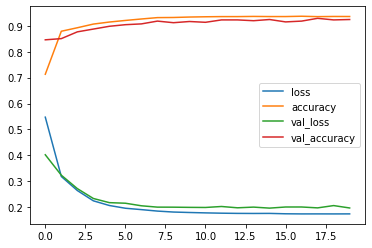

In [ ]:
#import pandas as pd
df=pd.DataFrame(c.history)#dataframe
df.plot()



Da questa tabella è possibile comprendere le performance di un modello predittivo di classificazione in modo da determinare quanto questo modello sia accurato ed efficace.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[797  46]
 [ 66 716]]


In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       843
           1       0.94      0.92      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



E' stato valutato anche il comportamento in caso di modello a regressore logistico

In [ ]:
#from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.5892

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64      3036
           1       0.59      0.47      0.53      2813

    accuracy                           0.59      5849
   macro avg       0.59      0.58      0.58      5849
weighted avg       0.59      0.59      0.58      5849


Confusion Matrix:
[[2110  926]
 [1477 1336]]

Average Accuracy:	0.5902

Standard Deviation:	0.0158


In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.5834

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       843
           1       0.59      0.45      0.51       782

    accuracy                           0.58      1625
   macro avg       0.58      0.58      0.57      1625
weighted avg       0.58      0.58      0.58      1625


Confusion Matrix:
[[597 246]
 [431 351]]



E' stato valutato con SVM in particolare SVC con diversi kernel ed è stata valutata l'accuratezza.

In [ ]:
#from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42) #differenza con poly e altri kernel

classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9388

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3036
           1       0.95      0.92      0.94      2813

    accuracy                           0.94      5849
   macro avg       0.94      0.94      0.94      5849
weighted avg       0.94      0.94      0.94      5849


Confusion Matrix:
[[2893  143]
 [ 215 2598]]

Average Accuracy:	0.9373

Standard Deviation:	0.0076


In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       843
           1       0.93      0.91      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625


Confusion Matrix:
[[790  53]
 [ 71 711]]



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42)

classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.6454

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      3036
           1       0.65      0.58      0.61      2813

    accuracy                           0.65      5849
   macro avg       0.65      0.64      0.64      5849
weighted avg       0.65      0.65      0.64      5849


Confusion Matrix:
[[2140  896]
 [1178 1635]]

Average Accuracy:	0.6461

Standard Deviation:	0.0272


In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6505

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       843
           1       0.65      0.58      0.61       782

    accuracy                           0.65      1625
   macro avg       0.65      0.65      0.65      1625
weighted avg       0.65      0.65      0.65      1625


Confusion Matrix:
[[604 239]
 [329 453]]



E' stata valutata l'accuratezza con il classificatore RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42, criterion='entropy')
rf.fit(X_train,y_train)
print('Accuratezza=',rf.score(X_test,y_test)*100)

Accuratezza= 95.81538461538462
